In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('ventas_manu.csv')

In [4]:
df.head()

,fecha,concepto,cantidad,precio_unitario,monto
0,23/12/2023,AGUACHILE CAMARÓN CRUDO ATÚN,2,$170.00,$340.00
1,23/12/2023,REFRESCO,2,$20.00,$40.00
2,23/12/2023,CEVICHE CH,1,$120.00,$90.00
3,23/12/2023,TOSTADA AGUACHILE,1,$70.00,$70.00
4,23/12/2023,REFRESCO,1,$20.00,$20.00


In [5]:
df.dtypes

fecha              object
concepto           object
cantidad            int64
precio_unitario    object
monto              object
dtype: object

In [6]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

In [7]:
df.head()

,fecha,concepto,cantidad,precio_unitario,monto
0,2023-12-23,AGUACHILE CAMARÓN CRUDO ATÚN,2,$170.00,$340.00
1,2023-12-23,REFRESCO,2,$20.00,$40.00
2,2023-12-23,CEVICHE CH,1,$120.00,$90.00
3,2023-12-23,TOSTADA AGUACHILE,1,$70.00,$70.00
4,2023-12-23,REFRESCO,1,$20.00,$20.00


In [8]:
# Remueve el signo de pesos y convierte a tipo numérico
df['monto'] = df['monto'].str.replace('$', '', regex=False).str.replace(',', '').astype(float)

# Verifica el cambio
print(df.dtypes)
print(df.head())


fecha              datetime64[ns]
concepto                   object
cantidad                    int64
precio_unitario            object
monto                     float64
dtype: object
       fecha                      concepto  cantidad precio_unitario  monto
0 2023-12-23  AGUACHILE CAMARÓN CRUDO ATÚN         2        $170.00   340.0
1 2023-12-23                      REFRESCO         2         $20.00    40.0
2 2023-12-23                    CEVICHE CH         1        $120.00    90.0
3 2023-12-23             TOSTADA AGUACHILE         1         $70.00    70.0
4 2023-12-23                      REFRESCO         1         $20.00    20.0


In [9]:
# Agrupar por fecha y sumar el monto
df_grouped = df.groupby('fecha')['monto'].sum().reset_index()

# Verifica el resultado
print(df_grouped)


         fecha   monto
0   2023-12-23  1280.0
1   2023-12-24  1180.0
2   2023-12-28  1910.0
3   2023-12-29  3000.0
4   2023-12-30  2430.0
..         ...     ...
198 2024-11-20  1120.0
199 2024-11-21  2830.0
200 2024-11-22  2280.0
201 2024-11-23  5460.0
202 2024-11-24  4840.0

[203 rows x 2 columns]


In [11]:
df_grouped

,fecha,monto
0,2023-12-23,1280.0
1,2023-12-24,1180.0
2,2023-12-28,1910.0
3,2023-12-29,3000.0
4,2023-12-30,2430.0
...,...,...
198,2024-11-20,1120.0
199,2024-11-21,2830.0
200,2024-11-22,2280.0
201,2024-11-23,5460.0


In [15]:
df = df_grouped

In [16]:
df = df.rename(columns={'fecha': 'ds', 'monto': 'y'})

In [17]:
from prophet import Prophet

In [18]:
m = Prophet()
m.fit(df)

15:08:33 - cmdstanpy - INFO - Chain [1] start processing
15:08:33 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
df.tail()

,ds,y
198,2024-11-20,1120.0
199,2024-11-21,2830.0
200,2024-11-22,2280.0
201,2024-11-23,5460.0
202,2024-11-24,4840.0


In [20]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
258,2025-01-19
259,2025-01-20
260,2025-01-21
261,2025-01-22
262,2025-01-23


In [21]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
258,2025-01-19,5954.383605,4076.537623,7853.239245
259,2025-01-20,3482.267779,1511.208634,5384.835219
260,2025-01-21,3486.675544,1580.923357,5384.734043
261,2025-01-22,2098.520611,171.945659,4073.823338
262,2025-01-23,3467.500435,1687.625552,5465.296389


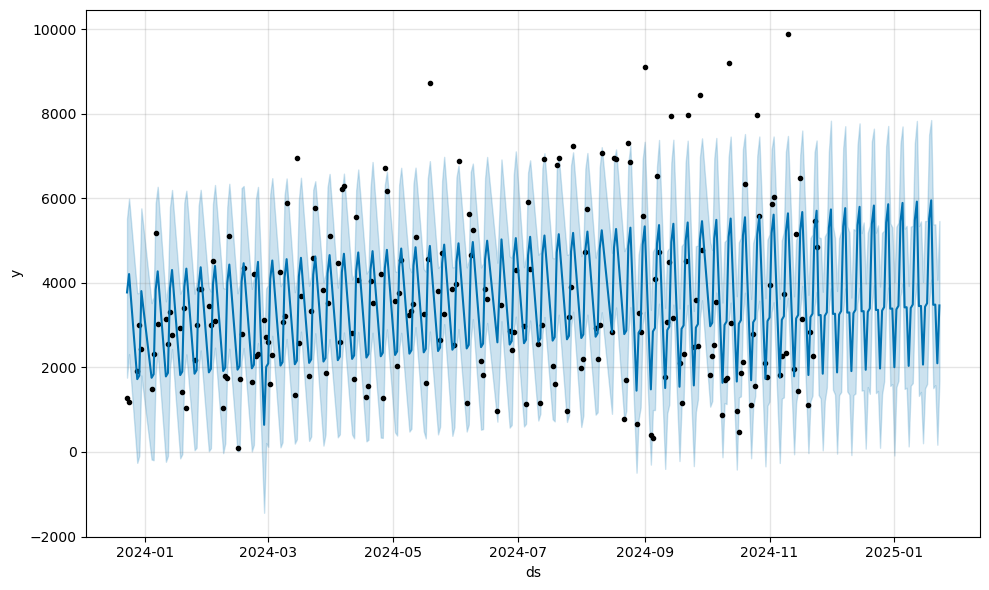

In [22]:
fig1 = m.plot(forecast)

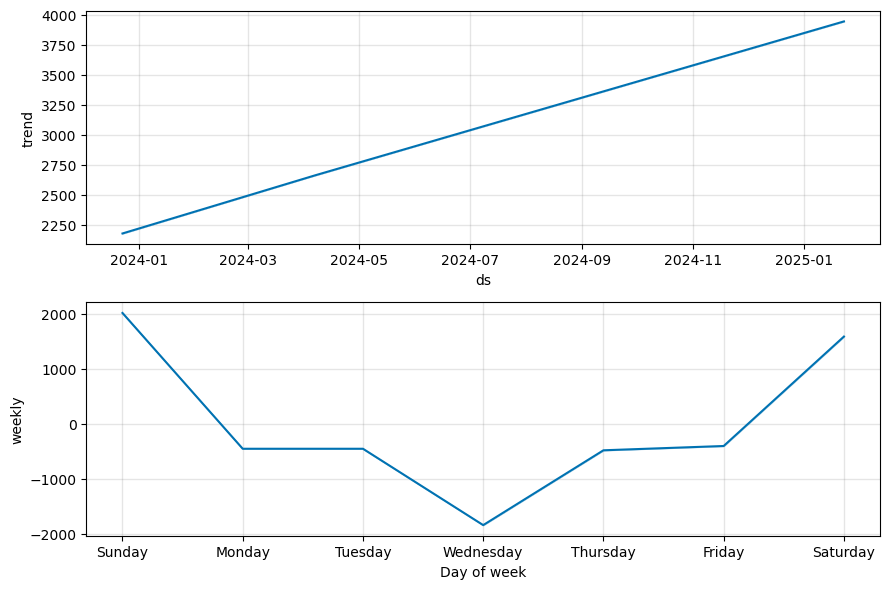

In [23]:
fig2 = m.plot_components(forecast)

## Proyección de ventas

In [24]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [25]:
plot_components_plotly(m, forecast)

In [26]:
forecast.to_csv('forecast.csv', index=False)